In [55]:
import torch
import pickle
# Model definition
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, ChebConv, SAGEConv
from torch_geometric.nn import global_mean_pool
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = SAGEConv(14, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 4)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)
        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return x
def test(loader):
    model.eval()
    correct = 0
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.x.float().to(device), data.edge_index.to(device), data.batch.to(device))  
        pred = out.argmax(dim=1).detach().cpu()  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.

model = GCN(hidden_channels=64)
# print(model)
device="cpu"
model.to(device)
model.load_state_dict(torch.load('model_'))

    
# # Import the file.
# import pickle
# with open('graph_all_casa_wind.pkl','rb') as f:
#     graphs= pickle.load(f)
    

filenames =['graph_1000_gen', 'graph_casa_nowcast_clustering_16' , 'graph_casa_nowcast_clustering_8' ,'graph_casa_wind_clustering']

for file in filenames:
    # nowcast clustering
    # Import the file.
    import pickle
    with open(file+'.pkl','rb') as f:
        graphs= pickle.load(f)
        
    # Separate the data according to labels
    # One for every type of workflow
    import numpy as np
    y_list = []
    for gr in graphs:
        y_list.append(gr['y'])
    
    tot = np.unique(np.array(y_list), return_counts=True)[1][1]
    # print("tot", tot, "classes data", np.unique(np.array(y_list), return_counts=True))
    import torch
    from torch_geometric.data import Data
    datasets_0=[]
    datasets_1=[]
    datasets_2=[]
    datasets_3=[]
    datasets=[]
    import numpy
    for element in graphs:
        gx = torch.tensor(numpy.array(element['x']) ) 

        ge =torch.tensor(numpy.array(element['edge_index']) ).T
        gy =torch.tensor(numpy.array(element['y']).reshape([-1]))
        v_min, v_max = gx.min(), gx.max()
        new_min, new_max = -1, 1
        gx = (gx - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
        # print(gx.min(), gx.max())
        if gy==0:
            datasets_0.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==1:
            datasets_1.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==2:
            datasets_2.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
        if gy==3:
            datasets_3.append( Data(x=gx, edge_index=ge, y=gy) )
            datasets.append( Data(x=gx, edge_index=ge, y=gy) )
            
    from torch_geometric.loader import DataLoader
    test_loader = DataLoader(datasets, batch_size=64, shuffle=True)
    test_acc = test(test_loader)
    print('WF', file, '\n Acc:',test_acc)
    
    
#     ## Now the plotting
#     import matplotlib.pyplot as plt
    
    
#     plt.figure( figsize=( 10, 10), dpi=200 )
#     data = datasets_0[30].to(device)
#     x, edge_index = data.x.float(), data.edge_index.long()
#     from torch_geometric.nn import GCNConv, GNNExplainer
#     explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
#     node_idx = 10
#     node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
#     ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
#     plt.title(file+'(cpu)')
#     plt.show()
#     # plt.show()
    
    
#     plt.figure( figsize=( 10, 10), dpi=200 )
#     data = datasets_1[30].to(device)
#     x, edge_index = data.x.float(), data.edge_index.long()
#     from torch_geometric.nn import GCNConv, GNNExplainer
#     explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
#     node_idx = 10
#     node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
#     ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
#     plt.title(file+'(hdd)')
#     plt.show()
#     #plt.show()
    
#     plt.figure( figsize=( 10, 10), dpi=200 )
#     data = datasets_2[30].to(device)
#     x, edge_index = data.x.float(), data.edge_index.long()
#     from torch_geometric.nn import GCNConv, GNNExplainer
#     explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
#     node_idx = 10
#     node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
#     ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
#     plt.title(file+'(loss)')
#     plt.show()
    
#     plt.figure(figsize=( 10, 10), dpi=200 )
#     data = datasets_3[30].to(device)
#     x, edge_index = data.x.float(), data.edge_index.long()
#     from torch_geometric.nn import GCNConv, GNNExplainer
#     explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
#     node_idx = 10
#     node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
#     ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold= 0.8, y=data.y)
#     plt.title(file+'(normal)')
#     plt.show()

WF graph_1000_gen 
 Acc: 0.9529411764705882
WF graph_casa_nowcast_clustering_16 
 Acc: 0.44471544715447153
WF graph_casa_nowcast_clustering_8 
 Acc: 0.9691056910569106
WF graph_casa_wind_clustering 
 Acc: 0.6097560975609756


0
3
(array([0, 1, 2, 3]), array([270, 300, 360, 300]))


In [42]:
# import numpy as np
# y_list = []
# for gr in graphs:
#     y_list.append(gr['y'])
# print(min(y_list))
# print(max(y_list))
# print(np.unique(np.array(y_list), return_counts=True))

# import torch
# from torch_geometric.data import Data
# datasets=[]
# import numpy
# for element in graphs:
#     gx = torch.tensor(numpy.array(element['x']) ) 
    
#     ge =torch.tensor(numpy.array(element['edge_index']) ).T
#     gy =torch.tensor(numpy.array(element['y']).reshape([-1]))
#     print(gx.shape, ge.shape, gy.shape)
#     # print(gy)
#     v_min, v_max = gx.min(), gx.max()
#     new_min, new_max = -1, 1
#     gx = (gx - v_min)/(v_max - v_min)*(new_max - new_min) + new_min
#     # print(gx.min(), gx.max())
#     datasets.append( Data(x=gx, edge_index=ge, y=gy) )

0
3
(array([0, 1, 2, 3]), array([200, 250, 250, 575]))
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 1

torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57

torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57

torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57

torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57, 14]) torch.Size([2, 129]) torch.Size([1])
torch.Size([57

300
Number of training graphs: 150
Number of test graphs: 150
Step 1:
Number of graphs in the current batch: 64
DataBatch(x=[832, 14], edge_index=[2, 1280], y=[64], batch=[832], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(x=[832, 14], edge_index=[2, 1280], y=[64], batch=[832], ptr=[65])

Step 3:
Number of graphs in the current batch: 22
DataBatch(x=[286, 14], edge_index=[2, 440], y=[22], batch=[286], ptr=[23])

GCN(
  (conv1): SAGEConv(14, 64)
  (conv2): SAGEConv(64, 64)
  (conv3): SAGEConv(64, 64)
  (lin): Linear(in_features=64, out_features=4, bias=True)
)


<All keys matched successfully>

Test Acc: 0.9466666666666667


In [23]:
!pip install  matplotlib

In [59]:
print(node_feat_mask)



tensor([0.3658, 0.5876, 0.8401, 0.6317, 0.1737, 0.2061, 0.2684, 0.2039, 0.4649,
        0.5683, 0.7474, 0.4138, 0.7976, 0.7081])


In [60]:
print(edge_mask)

tensor([0.6842, 0.7110, 0.7163, 0.6829, 0.6208, 0.6661, 0.6816, 0.6917, 0.6989,
        0.6820, 0.7122, 0.7072, 0.7092, 0.6889, 0.7469, 0.6879, 0.7170, 0.7382,
        0.7465, 0.7184, 0.4109, 0.6689, 0.4625, 0.5922, 0.4072, 0.4759, 0.4480,
        0.5013, 0.4980, 0.6727, 0.5896, 0.4930, 0.4412, 0.6829, 0.4117, 0.4382,
        0.4110, 0.5881, 0.3313, 0.6850, 0.4758, 0.5663, 0.5027, 0.2460, 0.4905,
        0.4256, 0.2943, 0.4751, 0.4697, 0.4819, 0.2871, 0.3159, 0.4081, 0.2847,
        0.2850, 0.3476, 0.5788, 0.5721, 0.5408, 0.4252, 0.2467, 0.5495, 0.2199,
        0.5482, 0.5495, 0.2120, 0.3166, 0.3058, 0.3072, 0.2597, 0.2991, 0.3573,
        0.1912, 0.1388, 0.3193, 0.3151, 0.2574, 0.1728, 0.3085, 0.2844, 0.1661,
        0.3025, 0.2977, 0.2492, 0.2451, 0.3319, 0.3987, 0.1927, 0.3457, 0.2643,
        0.3611, 0.2628, 0.2685, 0.2766, 0.3017, 0.3084, 0.3075, 0.3341, 0.1157,
        0.4480, 0.1136, 0.1194, 0.4813, 0.1013, 0.1337, 0.1516, 0.2311, 0.5389,
        0.1572, 0.3462, 0.3448, 0.2995, 

In [29]:
# Class 1

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 306.30it/s]


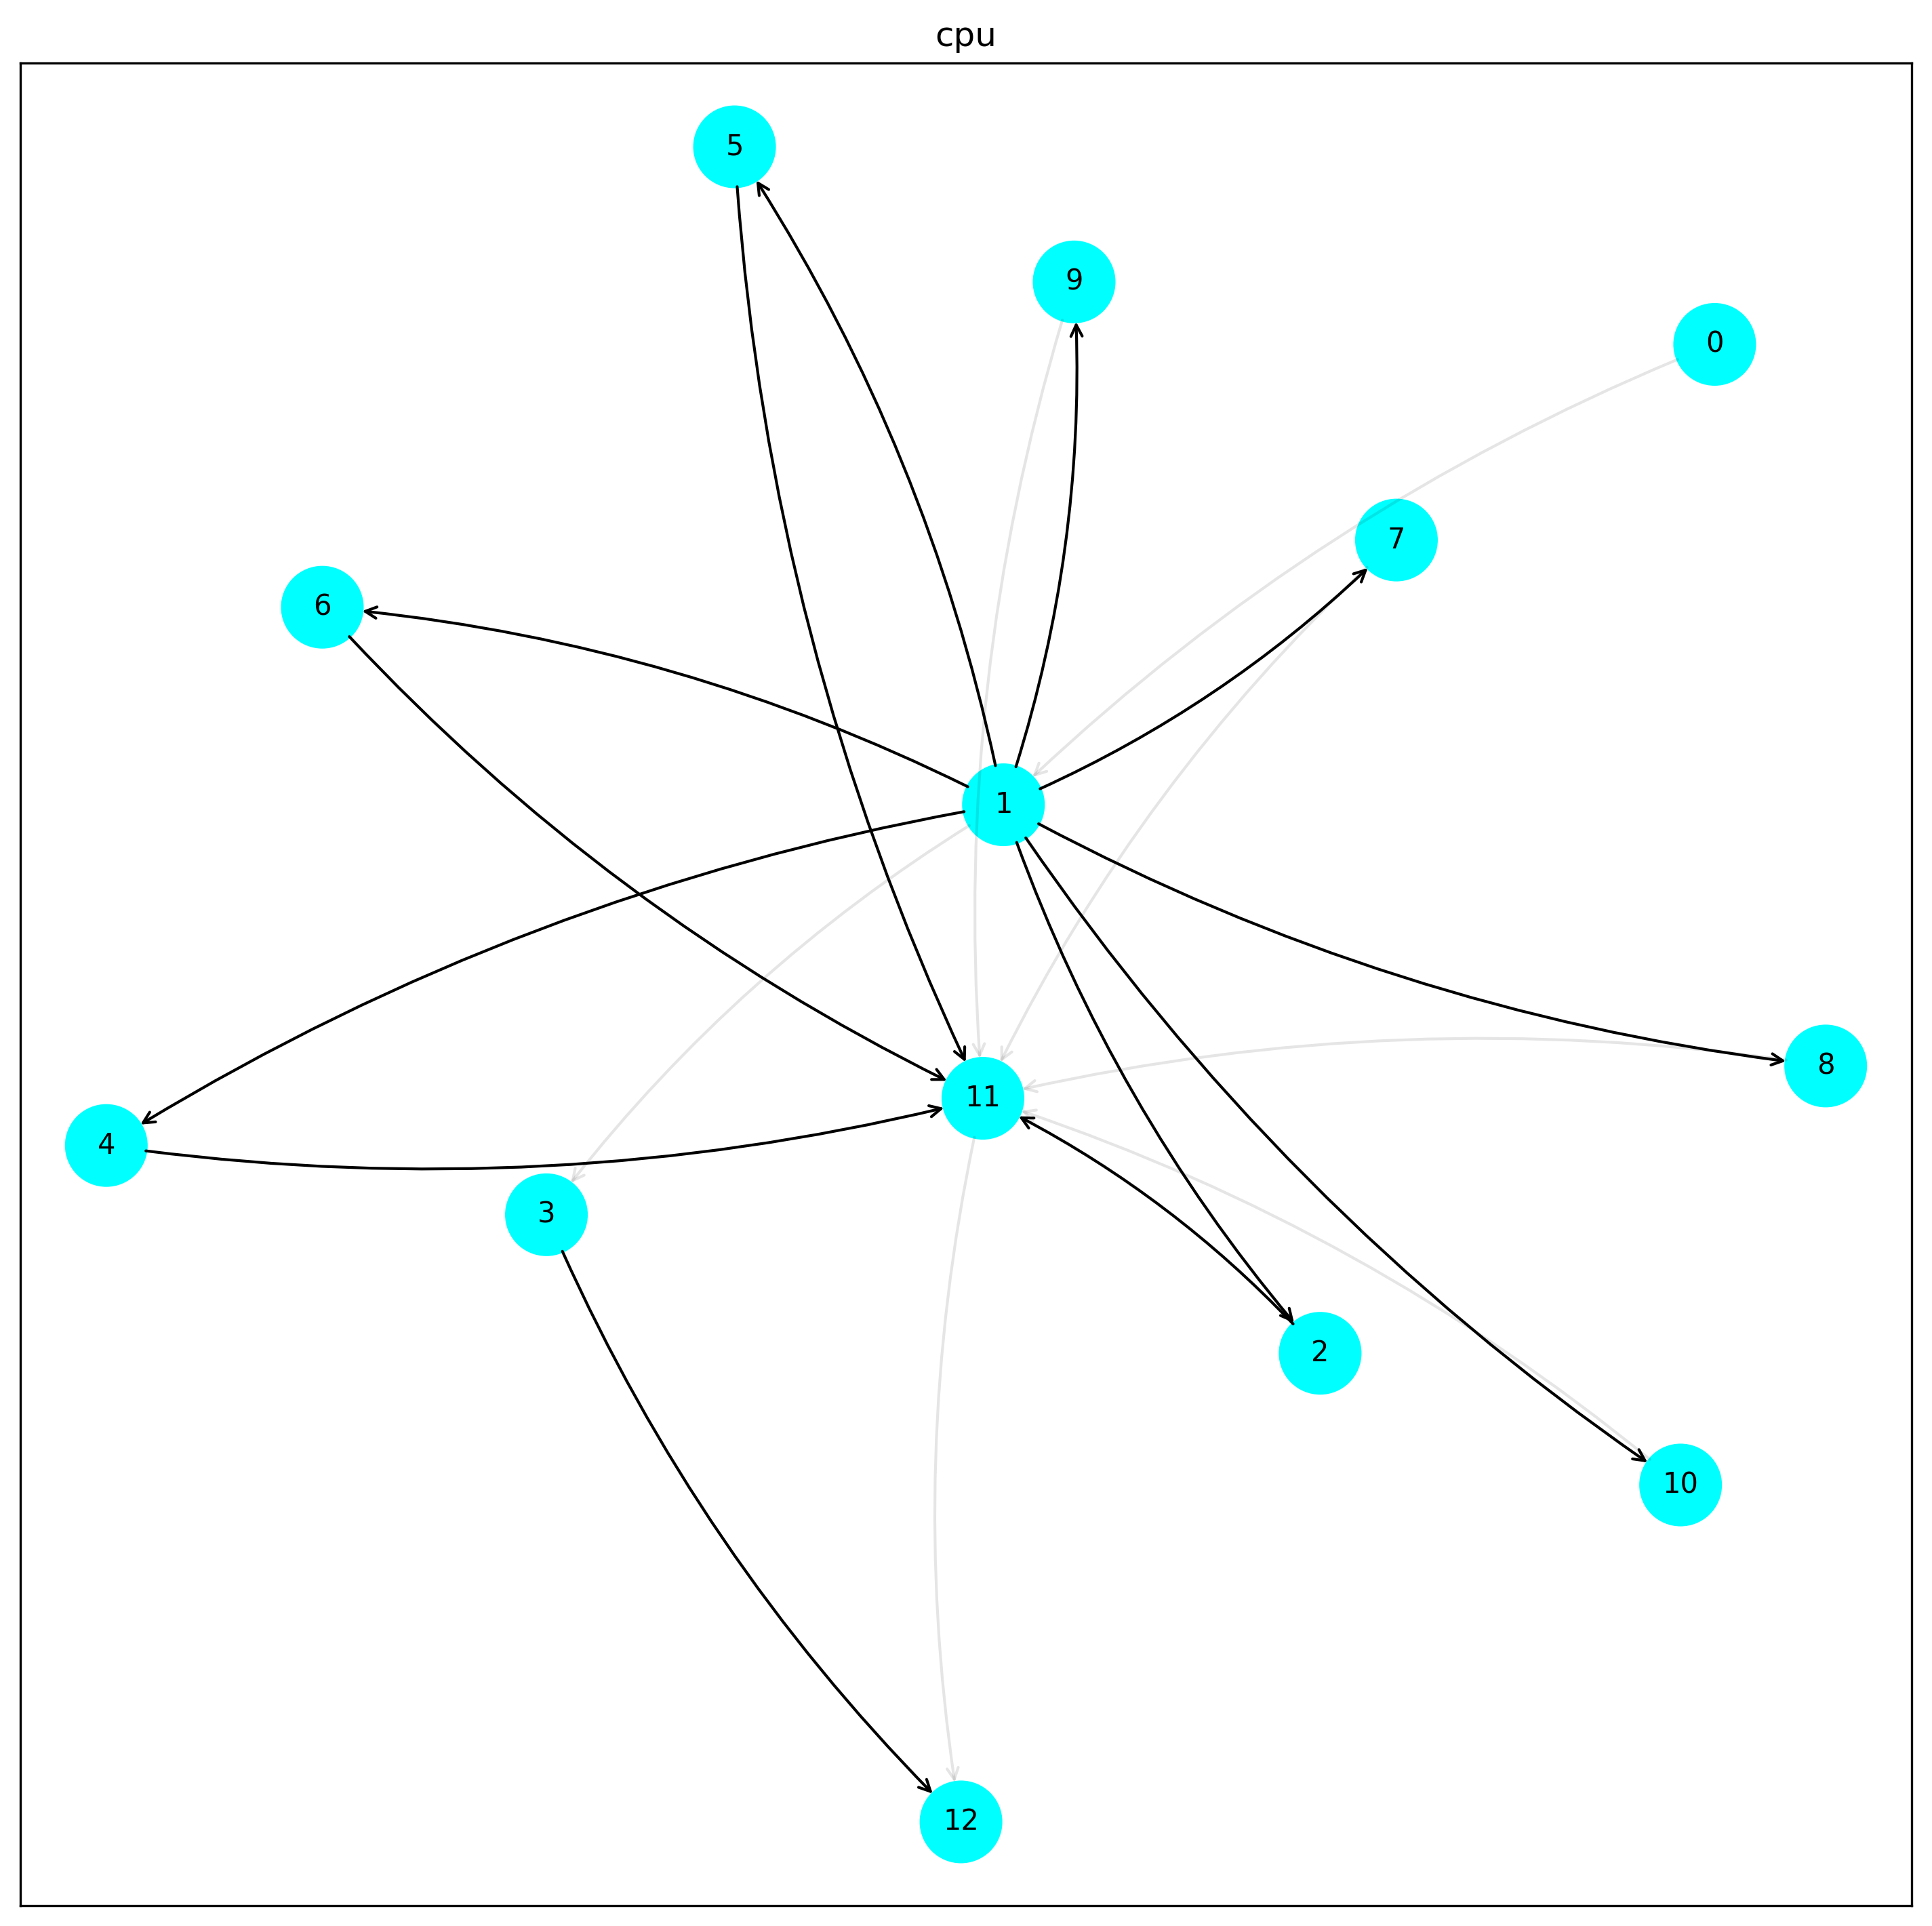

In [19]:
# Class 2

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 301.95it/s]


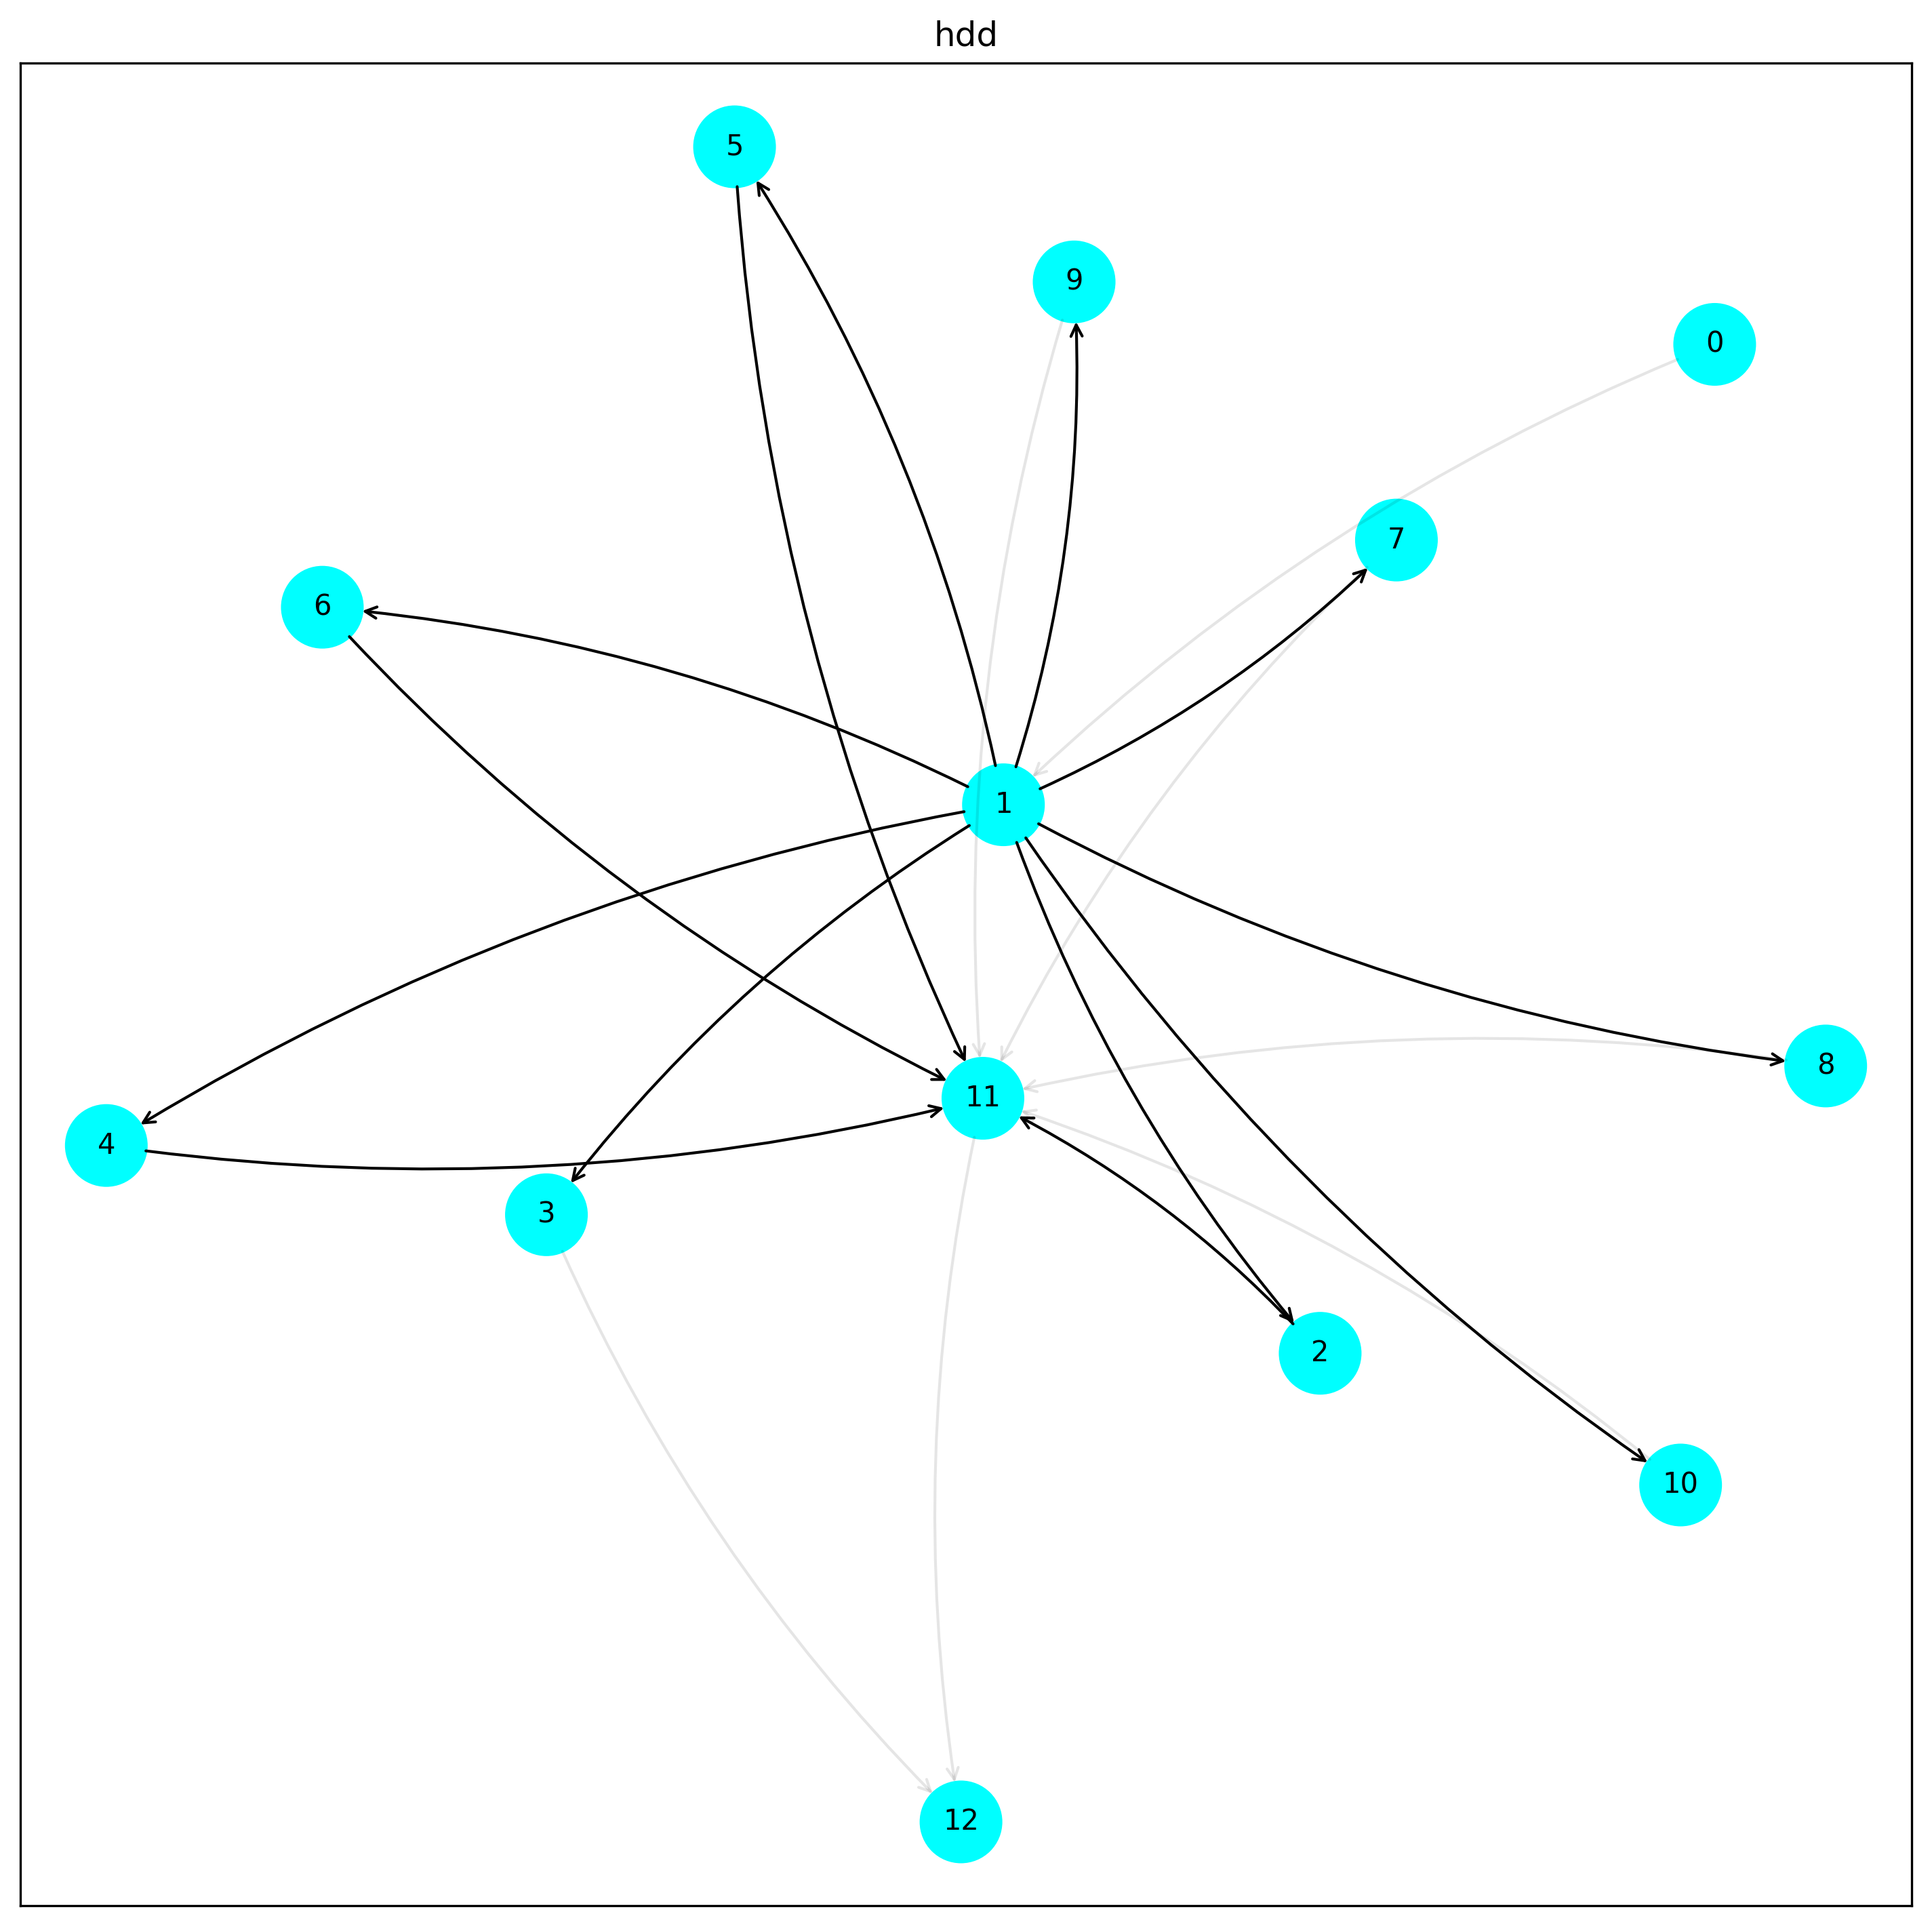

In [20]:
plt.figure(figsize=(12,12), dpi=300)
import matplotlib.pyplot as plt
data = datasets_1[30].to(device)
x, edge_index = data.x.float(), data.edge_index.long()

from torch_geometric.nn import GCNConv, GNNExplainer
explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
node_idx = 10
node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold=0.8,  y=data.y)
plt.title('hdd')
plt.show()

In [21]:
# Class 3

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 302.80it/s]


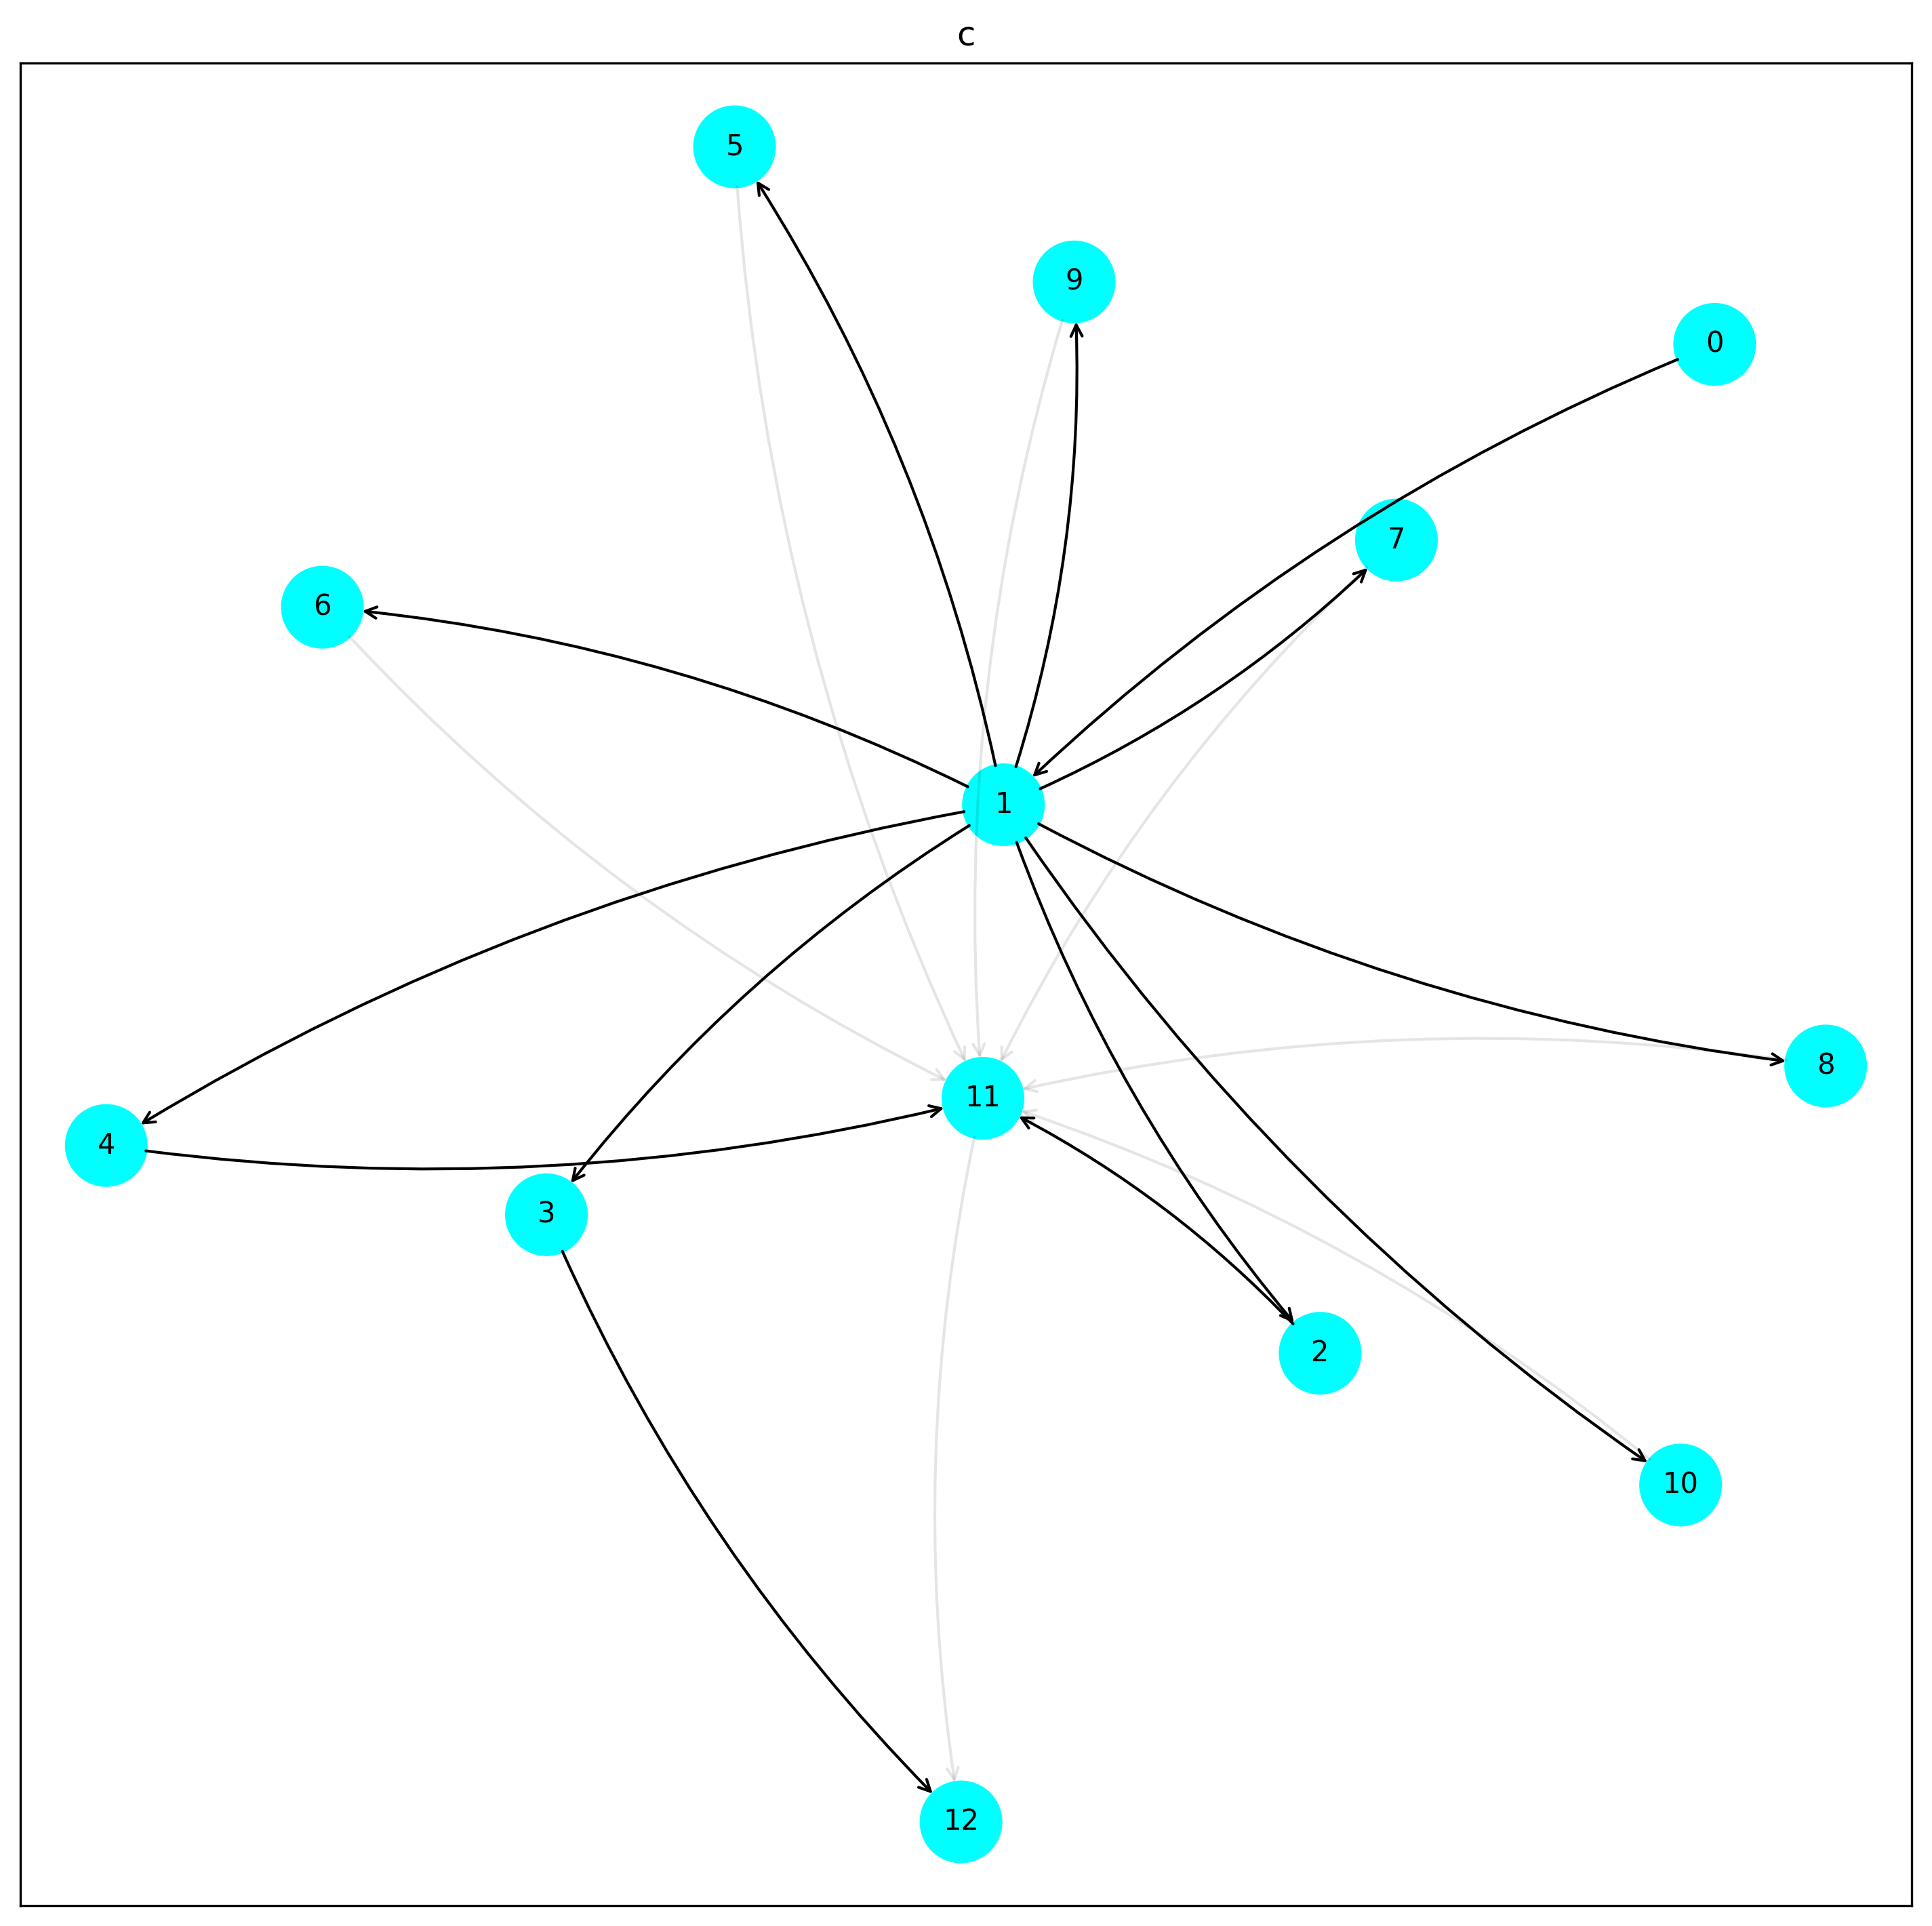

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12), dpi=300)
data = datasets_2[30].to(device)
x, edge_index = data.x.float(), data.edge_index.long()

from torch_geometric.nn import GCNConv, GNNExplainer
explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
node_idx = 10
node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold=0.8, y=data.y)
plt.title('c')
plt.show()

In [23]:
# Class 4

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 302.86it/s]


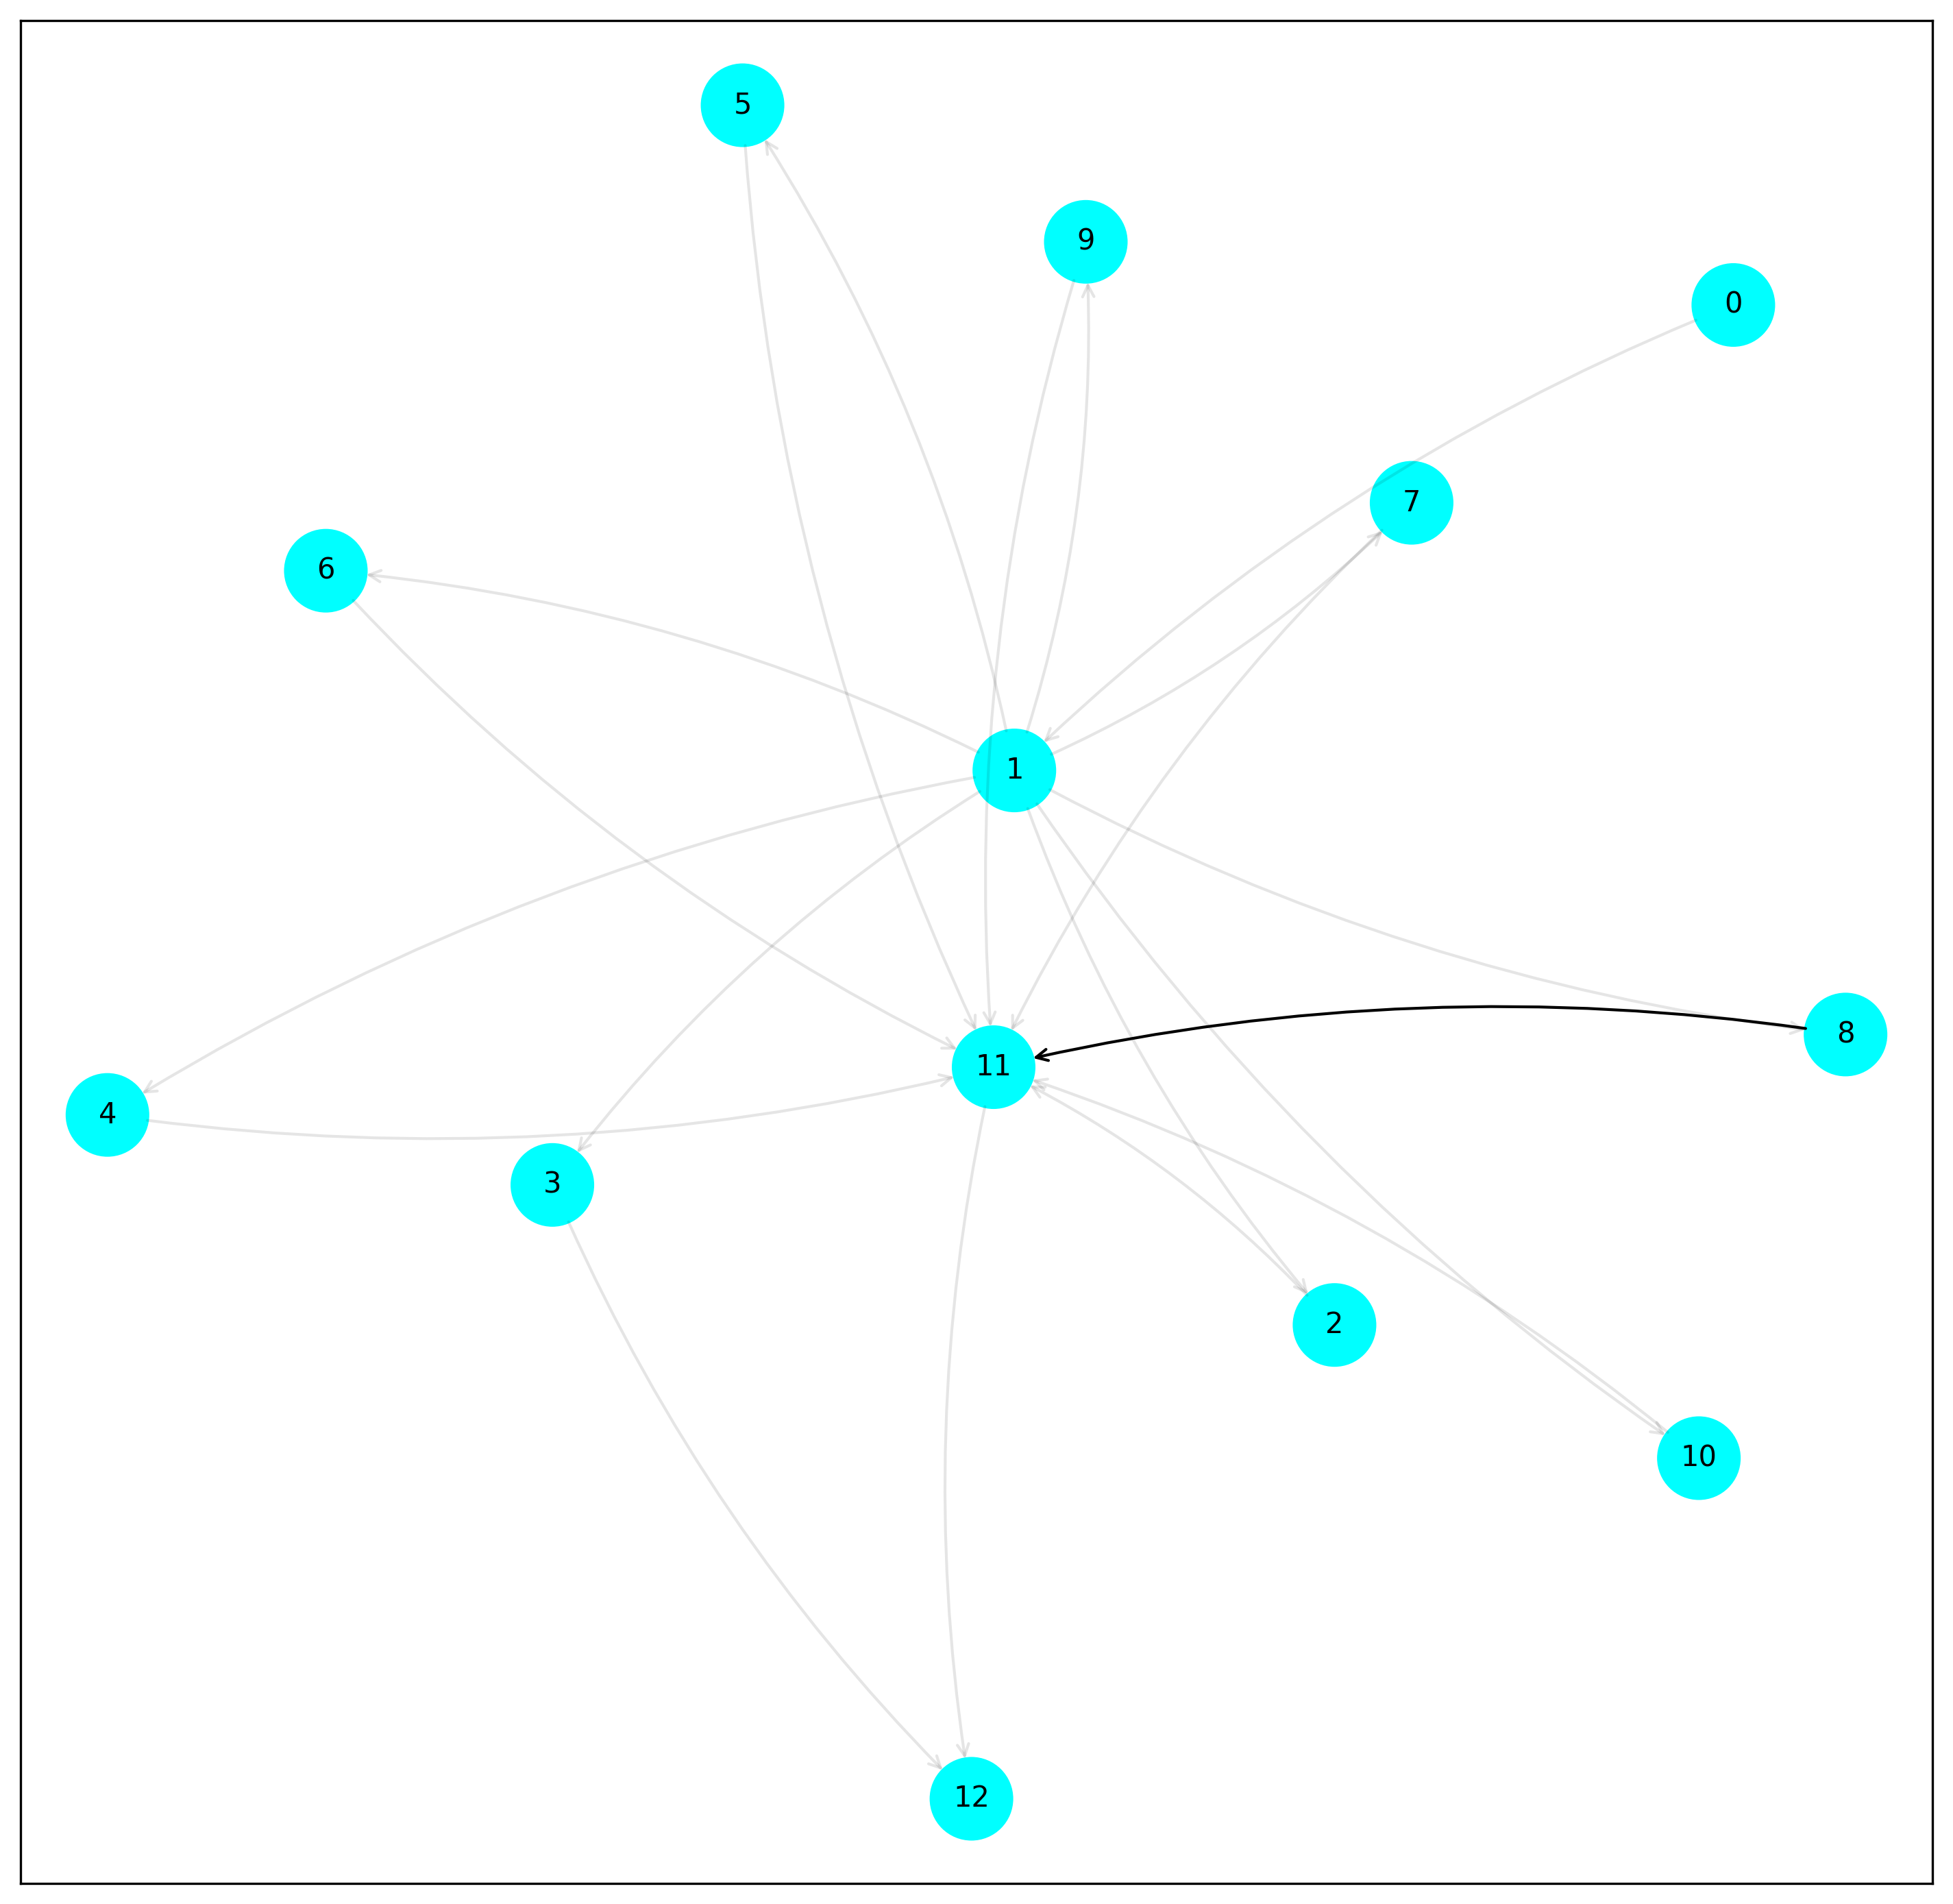

In [24]:
import matplotlib.pyplot as plt
data = datasets_3[30].to(device)
plt.figure(figsize=(12,12), dpi=300)
x, edge_index = data.x.float(), data.edge_index.long()

from torch_geometric.nn import GCNConv, GNNExplainer
explainer = GNNExplainer(model, epochs=200, return_type='log_prob')
node_idx = 10
node_feat_mask, edge_mask = explainer.explain_graph(x, edge_index)
ax, G = explainer.visualize_subgraph(-1, edge_index, edge_mask, threshold=0.8, y=data.y)
plt.show()